In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
df = pd.read_csv('Diabetes-Classification.csv')
df = df.dropna()

In [3]:
#display first five rows
df.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25.0,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30.0,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35.0,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40.0,High,160,7.8,Yes,Yes,Poor,No,Yes
5,50,Female,25.0,Normal,100,5.7,No,No,Healthy,Regular,No


In [4]:
from sklearn.preprocessing import LabelEncoder


In [5]:
#select non-numeric columns
cat_cols=['Gender', 'Blood Pressure', 'Family History of Diabetes', 'Smoking', 'Diet', 'Exercise']

In [6]:
#perform one-hot-encoding
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)    

In [7]:
df.head()

,Age,BMI,FBS,HbA1c,Diagnosis,Gender_Male,Blood Pressure_Low,Blood Pressure_Normal,Family History of Diabetes_Yes,Smoking_Yes,Diet_Poor,Exercise_Regular
0,45,25.0,100,5.7,No,True,False,True,False,False,False,True
1,55,30.0,120,6.4,Yes,False,False,False,True,True,True,False
2,65,35.0,140,7.1,Yes,True,False,False,True,True,True,False
3,75,40.0,160,7.8,Yes,False,False,False,True,True,True,False
5,50,25.0,100,5.7,No,False,False,True,False,False,False,True


In [8]:
#print all the columns
df.columns

Index(['Age', 'BMI', 'FBS', 'HbA1c', 'Diagnosis', 'Gender_Male',
       'Blood Pressure_Low', 'Blood Pressure_Normal',
       'Family History of Diabetes_Yes', 'Smoking_Yes', 'Diet_Poor',
       'Exercise_Regular'],
      dtype='object')

In [9]:
cat_cols = ['Gender_Male', 'Blood Pressure_Low',
       'Blood Pressure_Normal', 'Family History of Diabetes_Yes',
       'Smoking_Yes', 'Diet_Poor', 'Exercise_Regular', 'Diagnosis']

In [10]:
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [11]:
df.head()

,Age,BMI,FBS,HbA1c,Diagnosis,Gender_Male,Blood Pressure_Low,Blood Pressure_Normal,Family History of Diabetes_Yes,Smoking_Yes,Diet_Poor,Exercise_Regular
0,45,25.0,100,5.7,0,1,0,1,0,0,0,1
1,55,30.0,120,6.4,1,0,0,0,1,1,1,0
2,65,35.0,140,7.1,1,1,0,0,1,1,1,0
3,75,40.0,160,7.8,1,0,0,0,1,1,1,0
5,50,25.0,100,5.7,0,0,0,1,0,0,0,1


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 0 to 127
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             118 non-null    int64  
 1   BMI                             118 non-null    float64
 2   FBS                             118 non-null    int64  
 3   HbA1c                           118 non-null    float64
 4   Diagnosis                       118 non-null    int64  
 5   Gender_Male                     118 non-null    int64  
 6   Blood Pressure_Low              118 non-null    int64  
 7   Blood Pressure_Normal           118 non-null    int64  
 8   Family History of Diabetes_Yes  118 non-null    int64  
 9   Smoking_Yes                     118 non-null    int64  
 10  Diet_Poor                       118 non-null    int64  
 11  Exercise_Regular                118 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 12

In [13]:
df.describe()

,Age,BMI,FBS,HbA1c,Diagnosis,Gender_Male,Blood Pressure_Low,Blood Pressure_Normal,Family History of Diabetes_Yes,Smoking_Yes,Diet_Poor,Exercise_Regular
count,118.00000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,43.09322,36.220339,163.559322,7.924576,0.254237,0.516949,0.084746,0.296610,0.398305,0.627119,0.627119,0.372881
std,21.46792,16.542685,62.244698,2.178564,0.437288,0.501844,0.279691,0.458711,0.491637,0.485633,0.485633,0.485633
min,12.00000,10.000000,80.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.00000,24.000000,120.000000,6.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.00000,34.000000,160.000000,7.800000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,56.50000,48.500000,220.000000,9.900000,0.750000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,185.00000,105.000000,280.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
#select only features that are relevant to target variable
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=5) 

In [15]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [16]:
X_select = selector.fit_transform(X, y)
select_features=X.columns[selector.get_support()]
print(select_features)

Index(['FBS', 'Family History of Diabetes_Yes', 'Smoking_Yes', 'Diet_Poor',
       'Exercise_Regular'],
      dtype='object')


In [17]:
#created df with selected features
X1=df[select_features]
X1

,FBS,Family History of Diabetes_Yes,Smoking_Yes,Diet_Poor,Exercise_Regular
0,100,0,0,0,1
1,120,1,1,1,0
2,140,1,1,1,0
3,160,1,1,1,0
5,100,0,0,0,1
...,...,...,...,...,...
123,100,0,1,1,0
124,120,0,1,1,0
125,140,0,1,1,0
126,160,0,1,1,0


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=40)
X1_train, X1_test, y1_train, y1_test =  train_test_split(X1, y, test_size=0.3, random_state=40)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print('\nPerformance Report for whole features')
print(classification_report(y_test, y_pred))


Performance Report for whole features
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        26
           1       0.38      0.30      0.33        10

    accuracy                           0.67        36
   macro avg       0.56      0.55      0.56        36
weighted avg       0.65      0.67      0.65        36



In [20]:
knn.fit(X1_train, y1_train)
y1_pred=knn.predict(X1_test)
print('\nPerformance Report for 5 best features')
print(classification_report(y1_test, y1_pred))


Performance Report for 5 best features
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        26
           1       0.54      0.70      0.61        10

    accuracy                           0.75        36
   macro avg       0.70      0.73      0.71        36
weighted avg       0.78      0.75      0.76        36



In [21]:
svc=SVC(kernel='rbf', probability=True, random_state=40)

In [22]:
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)
print('\nPerformance Report for whole features')
print(classification_report(y_test, y_pred))


Performance Report for whole features
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        26
           1       0.00      0.00      0.00        10

    accuracy                           0.72        36
   macro avg       0.36      0.50      0.42        36
weighted avg       0.52      0.72      0.61        36



C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [23]:
svc.fit(X1_train, y1_train)
y1_pred=svc.predict(X1_test)
print('\nPerformance Report for 5 best features')
print(classification_report(y1_test, y1_pred))


Performance Report for 5 best features
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        26
           1       0.00      0.00      0.00        10

    accuracy                           0.72        36
   macro avg       0.36      0.50      0.42        36
weighted avg       0.52      0.72      0.61        36



C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

<Axes: >

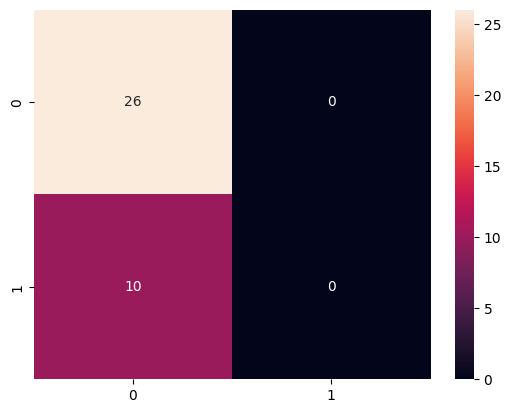

In [24]:
c=confusion_matrix(y_test, y_pred)
sns.heatmap(c, annot=True)


<Axes: >

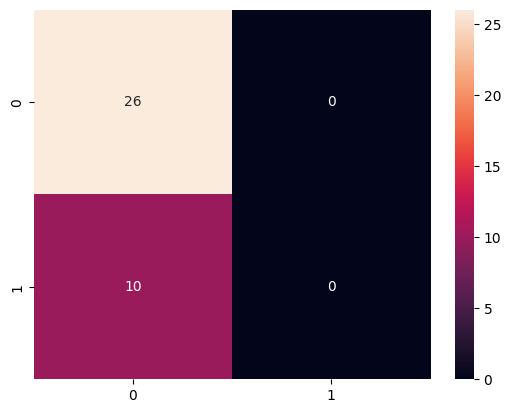

In [25]:
c1=confusion_matrix(y1_test, y1_pred)
sns.heatmap(c1, annot=True)